In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df['city'] = df['address'].str.split(',').str[1].str.strip()

In [8]:
df['address'].head()[0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [4]:
df['zipcode'] = df['address'].str.split(',').str[-2].str[-5:]

In [9]:
df['zipcode'].head()

0    98055
1    98133
2    98178
3    98118
4    98027
Name: zipcode, dtype: object

In [10]:
df_irs = pd.read_csv('../data/income_by_zip.csv')

In [11]:
df_wa = df_irs.loc[df_irs['STATE'] == 'WA',['STATE','ZIPCODE','N02650','A02650']]

In [12]:
df_wa['avg_inc'] = df_wa['A02650']/df_wa['N02650']

In [15]:
df['zipcode'] = df['zipcode'].astype(int)

In [16]:
df2 = df.merge(df_wa,left_on='zipcode',right_on='ZIPCODE',how='inner')

In [17]:
df2['month'] = pd.DatetimeIndex(df2['date']).month

In [18]:
df2['year'] = pd.DatetimeIndex(df2['date']).year

In [20]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,long,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,-122.19052,Renton,98055,WA,98055,12360.0,901850.0,72.96521,5,2022
1,3340401570,3/2/2022,750000.0,3,2.0,1830,7969,1.0,NO,NO,...,-122.21400,Renton,98055,WA,98055,12360.0,901850.0,72.96521,3,2022
2,7399301200,3/29/2022,728000.0,4,2.0,2170,7520,1.0,NO,NO,...,-122.18974,Renton,98055,WA,98055,12360.0,901850.0,72.96521,3,2022
3,9899200050,3/24/2022,565000.0,4,2.0,1400,10364,1.5,NO,NO,...,-122.21243,Renton,98055,WA,98055,12360.0,901850.0,72.96521,3,2022
4,6673070070,12/28/2021,645000.0,3,2.0,1520,8250,1.0,NO,NO,...,-122.18869,Renton,98055,WA,98055,12360.0,901850.0,72.96521,12,2021


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29220 entries, 0 to 29219
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29220 non-null  int64  
 1   date           29220 non-null  object 
 2   price          29220 non-null  float64
 3   bedrooms       29220 non-null  int64  
 4   bathrooms      29220 non-null  float64
 5   sqft_living    29220 non-null  int64  
 6   sqft_lot       29220 non-null  int64  
 7   floors         29220 non-null  float64
 8   waterfront     29220 non-null  object 
 9   greenbelt      29220 non-null  object 
 10  nuisance       29220 non-null  object 
 11  view           29220 non-null  object 
 12  condition      29220 non-null  object 
 13  grade          29220 non-null  object 
 14  heat_source    29194 non-null  object 
 15  sewer_system   29207 non-null  object 
 16  sqft_above     29220 non-null  int64  
 17  sqft_basement  29220 non-null  int64  
 18  sqft_g

In [22]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,yr_renovated,lat,long,zipcode,ZIPCODE,N02650,A02650,avg_inc,month,year
count,2.922000e+04,2.922000e+04,29220.000000,29220.000000,29220.000000,2.922000e+04,29220.000000,29220.000000,29220.000000,29220.000000,...,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,29220.000000,2.922000e+04,29220.000000,29220.000000,29220.000000
mean,4.536011e+09,1.113074e+06,3.435695,2.333042,2131.242129,1.714378e+04,1.517368,1826.198323,480.955168,336.478816,...,93.354654,47.542939,-122.214230,98077.691478,98077.691478,17557.823409,2.451197e+06,147.245109,6.873032,2021.361259
std,2.881813e+09,8.954033e+05,0.978466,0.895403,977.166856,6.100160e+04,0.548916,880.796654,585.926977,286.163426,...,421.742166,0.147688,0.152893,56.714226,56.714226,6714.525028,1.559883e+06,100.553401,3.103059,0.480374
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,...,0.000000,45.636797,-122.666021,98001.000000,98001.000000,1510.000000,1.529580e+05,50.833374,1.000000,2021.000000
25%,2.085201e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,...,0.000000,47.429563,-122.328407,98032.000000,98032.000000,12630.000000,1.403028e+06,85.709677,4.000000,2021.000000
50%,3.873950e+09,8.678180e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,...,0.000000,47.557565,-122.234343,98059.000000,98059.000000,17680.000000,2.169324e+06,126.027749,7.000000,2021.000000
75%,7.286650e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.077125e+04,2.000000,2290.000000,960.000000,520.000000,...,0.000000,47.671852,-122.127810,98117.000000,98117.000000,21990.000000,2.972411e+06,172.246538,9.000000,2022.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,...,2022.000000,48.111504,-117.056550,99403.000000,99403.000000,35340.000000,8.096083e+06,1538.235762,12.000000,2022.000000


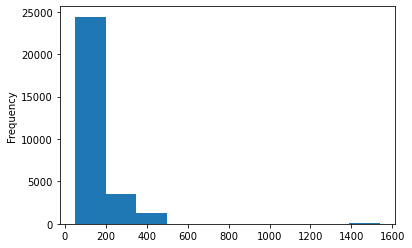

In [23]:
df2['avg_inc'].plot(kind='hist');

In [74]:
df_rich = df2.loc[(1000000 < df2['price']) & (df2['price'] < 5000000) & (df2['sqft_lot'] < 15000)]

In [75]:
df_rich.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,yr_renovated,lat,long,zipcode,ZIPCODE,N02650,A02650,avg_inc,month,year
count,8.817000e+03,8.817000e+03,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,...,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8817.000000,8.817000e+03,8817.000000,8817.000000,8817.000000
mean,4.711995e+09,1.630205e+06,3.801520,2.720994,2580.703754,7191.307134,1.655608,2156.905750,627.729953,370.611659,...,132.737779,47.626346,-122.212301,98076.489169,98076.489169,17858.543722,3.406343e+06,199.328704,6.583418,2021.417262
std,2.886253e+09,6.232357e+05,0.978713,0.857777,890.575454,3065.082687,0.532092,868.564736,609.002937,265.757462,...,497.974602,0.083396,0.141431,50.814957,50.814957,7087.953173,1.798171e+06,107.570303,3.050968,0.493135
min,7.200091e+06,1.000112e+06,0.000000,0.000000,260.000000,553.000000,1.000000,260.000000,0.000000,0.000000,...,0.000000,47.261785,-122.516290,98001.000000,98001.000000,1510.000000,3.603570e+05,58.030955,1.000000,2021.000000
25%,2.222900e+09,1.200000e+06,3.000000,2.000000,1930.000000,4978.000000,1.000000,1470.000000,0.000000,0.000000,...,0.000000,47.571690,-122.326840,98033.000000,98033.000000,12570.000000,2.203959e+06,135.355123,4.000000,2021.000000
50%,4.040800e+09,1.430000e+06,4.000000,2.500000,2460.000000,7112.000000,2.000000,2000.000000,660.000000,440.000000,...,0.000000,47.636495,-122.219000,98074.000000,98074.000000,17250.000000,2.688894e+06,171.384662,7.000000,2021.000000
75%,7.501000e+09,1.850000e+06,4.000000,3.000000,3130.000000,9307.000000,2.000000,2750.000000,1100.000000,550.000000,...,0.000000,47.685425,-122.127840,98116.000000,98116.000000,20180.000000,4.377802e+06,223.529340,9.000000,2022.000000
max,9.890000e+09,4.995000e+06,11.000000,7.500000,9627.000000,14998.000000,4.000000,8882.000000,3960.000000,2120.000000,...,2022.000000,48.100990,-121.417590,98272.000000,98272.000000,35340.000000,8.096083e+06,1538.235762,12.000000,2022.000000


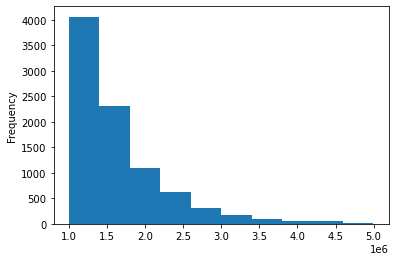

In [69]:
df_rich['price'].plot(kind='hist');

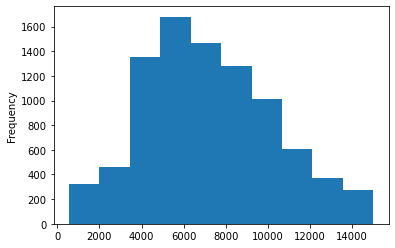

In [70]:
df_rich['sqft_lot'][df_rich['sqft_lot'] < 15000].plot(kind='hist');

In [49]:
df_rich['price'].sort_values(ascending=False).head(20)

11692    4995000.0
11563    4988000.0
18206    4950000.0
19413    4940000.0
16300    4925000.0
11273    4900000.0
11272    4900000.0
11271    4900000.0
17042    4900000.0
26696    4885000.0
18588    4820000.0
11680    4816000.0
19646    4800000.0
11718    4800000.0
11705    4800000.0
18265    4750000.0
27210    4710000.0
4121     4700000.0
11762    4700000.0
18353    4700000.0
Name: price, dtype: float64

In [53]:
df_rich.groupby('grade')['price'].mean().sort_values(ascending=False)

grade
13 Mansion       3.982000e+06
12 Luxury        3.356116e+06
11 Excellent     2.869559e+06
1 Cabin          2.500000e+06
10 Very Good     2.333563e+06
4 Low            1.892250e+06
9 Better         1.809500e+06
6 Low Average    1.585070e+06
5 Fair           1.558410e+06
3 Poor           1.515000e+06
8 Good           1.486263e+06
7 Average        1.342629e+06
Name: price, dtype: float64

In [55]:
df_rich['grade'].value_counts(ascending=False)

8 Good           4003
9 Better         2759
7 Average        2516
10 Very Good     1234
11 Excellent      336
6 Low Average     184
12 Luxury          82
5 Fair             40
13 Mansion          9
4 Low               6
1 Cabin             1
3 Poor              1
Name: grade, dtype: int64

In [73]:
df_rich.loc[df_rich['sqft_lot'] == 553]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,long,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year
5720,3363900207,6/1/2022,1100000.0,3,2.0,1640,553,3.0,NO,NO,...,-122.35507,Seattle,98103,WA,98103,29710.0,4386249.0,147.635443,6,2022


In [76]:
df_rich['mean_price'] = df_rich['price'].mean()

<ipython-input-76-45362ae65b1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rich['mean_price'] = df_rich['price'].mean()


In [77]:
df_rich.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year,mean_price
98,8557200120,3/31/2022,1020000.0,4,2.5,2020,10675,2.0,NO,NO,...,Renton,98055,WA,98055,12360.0,901850.0,72.96521,3,2022,1.630205e+06
116,2909270150,12/2/2021,1028000.0,4,3.5,2889,6162,2.0,NO,NO,...,Renton,98055,WA,98055,12360.0,901850.0,72.96521,12,2021,1.630205e+06
119,88000260,11/21/2021,1100000.0,5,3.0,3127,8321,2.0,NO,NO,...,Renton,98055,WA,98055,12360.0,901850.0,72.96521,11,2021,1.630205e+06
129,7222000267,7/7/2021,1141327.0,8,4.5,3780,7499,2.0,NO,NO,...,Renton,98055,WA,98055,12360.0,901850.0,72.96521,7,2021,1.630205e+06
176,7399200130,5/17/2022,1150000.0,4,2.5,3100,7400,2.0,NO,NO,...,Renton,98055,WA,98055,12360.0,901850.0,72.96521,5,2022,1.630205e+06


In [79]:
df_rich['waterfront'].value_counts()

NO     8717
YES     100
Name: waterfront, dtype: int64

In [81]:
y = df_rich['price']
x = df_rich['mean_price']
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                nan
Time:                        16:01:34   Log-Likelihood:            -1.3015e+05
No. Observations:                8817   AIC:                         2.603e+05
Df Residuals:                    8816   BIC:                         2.603e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mean_price     1.0000      0.004    245.612      0.000       0.992       1.008
==============================================================================
Omnibus:                     3324.442   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12242.220
Skew:                           1.899   Prob(JB):                         0.00
Kurtosis:                       7.347   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [84]:
df_rich.corr()['price'].sort_values(ascending=False)

price            1.00000
sqft_living      0.56845
sqft_above       0.49429
bathrooms        0.43914
avg_inc          0.39971
A02650           0.30826
sqft_patio       0.24828
sqft_lot         0.24268
bedrooms         0.23661
sqft_garage      0.22948
floors           0.21294
yr_built         0.13953
sqft_basement    0.12249
yr_renovated     0.07485
year             0.04805
long             0.02699
lat              0.00180
mean_price      -0.00000
month           -0.02855
id              -0.04293
N02650          -0.04590
zipcode         -0.12727
ZIPCODE         -0.12727
Name: price, dtype: float64

In [86]:
y = df_rich['price']
x = df_rich['sqft_living']
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     4208.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:04:33   Log-Likelihood:            -1.2843e+05
No. Observations:                8817   AIC:                         2.569e+05
Df Residuals:                    8815   BIC:                         2.569e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.036e+05   1.67e+04     36.053      0.000    5.71e+05    6.36e+05
sqft_living   397.8106      6.132     64.872      0.000     385.790     409.831
==============================================================================
Omnibus:                     2788.473   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11241.725
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                       7.618   Cond. No.                     8.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
df_rich.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,lat,long,zipcode,ZIPCODE,N02650,A02650,avg_inc,month,year,mean_price
id,1.00000,-0.04293,0.00040,-0.01973,0.00063,-0.01281,0.00474,0.01558,-0.02756,0.02519,...,-0.04388,0.10702,-0.03361,-0.03361,-0.01708,-0.04948,-0.02255,0.00059,-0.00462,0.00000
price,-0.04293,1.00000,0.23661,0.43914,0.56845,0.24268,0.21294,0.49429,0.12249,0.22948,...,0.00180,0.02699,-0.12727,-0.12727,-0.04590,0.30826,0.39971,-0.02855,0.04805,-0.00000
bedrooms,0.00040,0.23661,1.00000,0.55825,0.57926,0.15254,0.20133,0.46719,0.14380,0.18779,...,-0.09822,0.11985,-0.09944,-0.09944,-0.02952,-0.02044,-0.01072,0.07248,-0.09537,-0.00000
bathrooms,-0.01973,0.43914,0.55825,1.00000,0.73965,0.09771,0.40535,0.61893,0.14025,0.34212,...,-0.12207,0.15283,-0.08774,-0.08774,-0.08367,-0.01068,0.04586,0.08865,-0.12577,-0.00000
sqft_living,0.00063,0.56845,0.57926,0.73965,1.00000,0.24486,0.40429,0.84002,0.20319,0.41857,...,-0.19334,0.21449,-0.10266,-0.10266,-0.14626,-0.02149,0.08824,0.10312,-0.13765,-0.00000
sqft_lot,-0.01281,0.24268,0.15254,0.09771,0.24486,1.00000,-0.27540,0.22245,-0.00712,0.38134,...,-0.08828,0.28769,-0.35891,-0.35891,-0.06668,0.14342,0.20684,0.03517,-0.03099,-0.00000
floors,0.00474,0.21294,0.20133,0.40535,0.40429,-0.27540,1.00000,0.59409,-0.33823,0.15400,...,-0.12064,0.11393,0.03998,0.03998,-0.08733,-0.08735,-0.03822,0.04063,-0.06181,-0.00000
sqft_above,0.01558,0.49429,0.46719,0.61893,0.84002,0.22245,0.59409,1.00000,-0.28046,0.51385,...,-0.22423,0.38105,-0.21093,-0.21093,-0.17178,-0.01831,0.10360,0.08593,-0.11302,-0.00000
sqft_basement,-0.02756,0.12249,0.14380,0.14025,0.20319,-0.00712,-0.33823,-0.28046,1.00000,-0.14117,...,0.08467,-0.38905,0.27701,0.27701,0.06621,-0.01714,-0.05402,0.01418,-0.02770,0.00000
sqft_garage,0.02519,0.22948,0.18779,0.34212,0.41857,0.38134,0.15400,0.51385,-0.14117,1.00000,...,-0.14345,0.48954,-0.41495,-0.41495,-0.09173,0.06465,0.11003,0.03616,-0.05207,0.00000


In [89]:
y = df_rich['price']
x = df_rich[['sqft_living','avg_inc','bedrooms','sqft_lot','sqft_patio','floors']]
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1261.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:09:35   Log-Likelihood:            -1.2742e+05
No. Observations:                8817   AIC:                         2.549e+05
Df Residuals:                    8810   BIC:                         2.549e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.177e+05   2.77e+04     11.472      0.000    2.63e+05    3.72e+05
sqft_living   386.7360      7.855     49.235      0.000     371.339     402.133
avg_inc      1964.3971     46.477     42.266      0.000    1873.292    2055.503
bedrooms     -6.54e+04   6138.928    -10.653      0.000   -7.74e+04   -5.34e+04
sqft_lot        9.5467      1.849      5.163      0.000       5.922      13.171
sqft_patio    212.9362     22.231      9.578      0.000     169.358     256.515
floors       3.085e+04   1.11e+04      2.788      0.005    9156.428    5.25e+04
==============================================================================
Omnibus:                     2788.994   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13867.163
Skew:                           1.447   Prob(JB):                         0.00
Kurtosis:                       8.420   Cond. No.                     4.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
df_rich.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8817 entries, 98 to 29219
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8817 non-null   int64  
 1   date           8817 non-null   object 
 2   price          8817 non-null   float64
 3   bedrooms       8817 non-null   int64  
 4   bathrooms      8817 non-null   float64
 5   sqft_living    8817 non-null   int64  
 6   sqft_lot       8817 non-null   int64  
 7   floors         8817 non-null   float64
 8   waterfront     8817 non-null   object 
 9   greenbelt      8817 non-null   object 
 10  nuisance       8817 non-null   object 
 11  view           8817 non-null   object 
 12  condition      8817 non-null   object 
 13  grade          8817 non-null   object 
 14  heat_source    8817 non-null   object 
 15  sewer_system   8814 non-null   object 
 16  sqft_above     8817 non-null   int64  
 17  sqft_basement  8817 non-null   int64  
 18  sqft_g

In [92]:
df_rich['seattle'] = np.where(df_rich['city'] == 'Seattle',1,0)

<ipython-input-92-f0e740f20f4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rich['seattle'] = np.where(df_rich['city'] == 'Seattle',1,0)


In [93]:
df_rich['seattle'].value_counts()

0    5276
1    3541
Name: seattle, dtype: int64

In [100]:
y = df_rich['price']
x = df_rich[['sqft_living','avg_inc','sqft_lot','floors','seattle']]
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1553.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:17:24   Log-Likelihood:            -1.2737e+05
No. Observations:                8817   AIC:                         2.547e+05
Df Residuals:                    8811   BIC:                         2.548e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.217e+05   2.83e+04     -4.302      0.000   -1.77e+05   -6.62e+04
sqft_living   359.6398      6.506     55.278      0.000     346.887     372.393
avg_inc      2149.7065     46.819     45.915      0.000    2057.930    2241.483
sqft_lot       28.6021      2.057     13.903      0.000      24.569      32.635
floors       6.279e+04    1.1e+04      5.690      0.000    4.12e+04    8.44e+04
seattle      2.132e+05   1.18e+04     18.052      0.000     1.9e+05    2.36e+05
==============================================================================
Omnibus:                     2804.188   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14885.158
Skew:                           1.433   Prob(JB):                         0.00
Kurtosis:                       8.684   Cond. No.                     5.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
df_rich.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

bedrooms
6    1915638.98016
5    1905839.19316
7    1766763.04167
4    1675475.87967
1    1574772.05882
8    1546633.08000
0    1514000.00000
9    1492727.27273
3    1456394.24226
10   1437500.00000
2    1384526.24726
11   1200000.00000
Name: price, dtype: float64

In [99]:
df_rich.loc[df_rich['sqft_patio'] == 0].count()

id               1361
date             1361
price            1361
bedrooms         1361
bathrooms        1361
sqft_living      1361
sqft_lot         1361
floors           1361
waterfront       1361
greenbelt        1361
nuisance         1361
view             1361
condition        1361
grade            1361
heat_source      1361
sewer_system     1361
sqft_above       1361
sqft_basement    1361
sqft_garage      1361
sqft_patio       1361
yr_built         1361
yr_renovated     1361
address          1361
lat              1361
long             1361
city             1361
zipcode          1361
STATE            1361
ZIPCODE          1361
N02650           1361
A02650           1361
avg_inc          1361
month            1361
year             1361
mean_price       1361
seattle          1361
dtype: int64

In [106]:
df_zero_bed = df_rich.loc[df_rich['bedrooms'] == 0]

In [105]:
df_zero_bed.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,long,zipcode,ZIPCODE,N02650,A02650,avg_inc,month,year,mean_price,seattle
count,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,...,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000,34.00000
mean,3855589117.26471,1574772.05882,1.00000,1.30882,1036.17647,7405.91176,1.23529,927.05882,267.35294,99.41176,...,-122.31420,98107.85294,98107.85294,16467.64706,2795293.00000,170.09508,6.76471,2021.41176,1630204.66020,0.61765
std,2758703267.69408,606633.66450,0.00000,0.73870,827.02099,3175.66616,0.41259,759.00864,370.18676,189.17590,...,0.09547,47.70816,47.70816,6088.75867,1717124.24376,84.66102,3.09505,0.49955,0.00000,0.49327
min,7200161.00000,1014000.00000,1.00000,1.00000,350.00000,3760.00000,1.00000,350.00000,0.00000,0.00000,...,-122.47451,98008.00000,98008.00000,5680.00000,518079.00000,60.73317,2.00000,2021.00000,1630204.66020,0.00000
25%,1802675627.50000,1200000.00000,1.00000,1.00000,532.50000,5000.00000,1.00000,462.50000,0.00000,0.00000,...,-122.37925,98079.50000,98079.50000,11985.00000,2054714.25000,120.67570,5.00000,2021.00000,1630204.66020,0.00000
50%,3726301577.50000,1352500.00000,1.00000,1.00000,740.00000,6172.50000,1.00000,680.00000,0.00000,0.00000,...,-122.33832,98107.00000,98107.00000,17250.00000,2295452.00000,147.63544,6.50000,2021.00000,1630204.66020,1.00000
75%,5450800239.75000,1732500.00000,1.00000,1.00000,1007.50000,9535.50000,1.37500,977.50000,460.00000,0.00000,...,-122.28659,98135.25000,98135.25000,18410.00000,2901531.75000,179.36761,9.75000,2022.00000,1630204.66020,1.00000
max,9831200510.00000,3400000.00000,1.00000,4.50000,4000.00000,14417.00000,2.00000,4000.00000,1080.00000,660.00000,...,-122.03439,98199.00000,98199.00000,29710.00000,7176170.00000,411.91671,12.00000,2022.00000,1630204.66020,1.00000


In [107]:
df_rich['bedrooms'].value_counts(ascending=False)

4     3640
3     2939
5     1403
2      457
6      252
7       48
1       34
8       25
9       11
0        5
10       2
11       1
Name: bedrooms, dtype: int64